<a href="https://colab.research.google.com/github/MiTi-alt/Ml_Project/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Đồ án môn máy học: Auto MPG Data Set

Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from prettytable import PrettyTable
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import pandas as pd
import seaborn as sns


Load dữ liệu


In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv(url, sep='\s+', names=column_names, na_values=['?'])

Tiền xử lí

In [4]:

#  thay thế các hàng chứa giá trị bị khuyết trong DataFrame df bằng giá trị trung bình.
df.fillna(df.mean(), inplace=True)
# Biến mpg_mean được gán giá trị 20 giá trị hao tổn nguyên liệu.
mpg_mean = 20
# tạo một cột mới trong DataFrame df, được gọi là "target", được tính bằng cách so sánh giá trị của cột "mpg" với giá trị trung bình của "mpg_mean". 
#Nếu giá trị "mpg" lớn hơn hoặc bằng mpg_mean, giá trị trong cột "target" sẽ là 1, ngược lại sẽ là 0.
df['target'] = df['mpg'].apply(lambda x: 1 if x >= mpg_mean else 0)
#tạo biến X chứa tất cả các cột trong DataFrame df trừ cột "mpg", "car name" và "target".
X = df.drop(['mpg', 'car name', 'target'], axis=1)
#Biến y được gán giá trị của cột "target" trong DataFrame df.
y = df['target']

#chia tập dữ liệu thành tập huấn luyện và tập kiểm tra, với tỷ lệ 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-4-8e51433ce141>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Phân bố dữ liệu

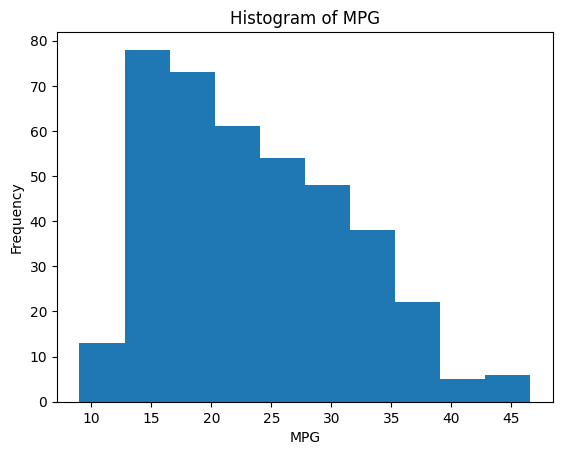

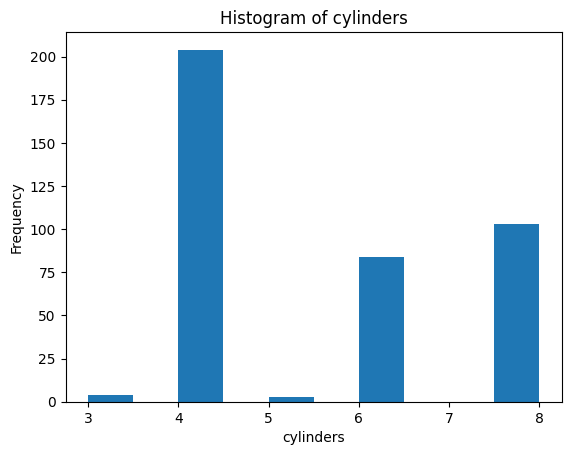

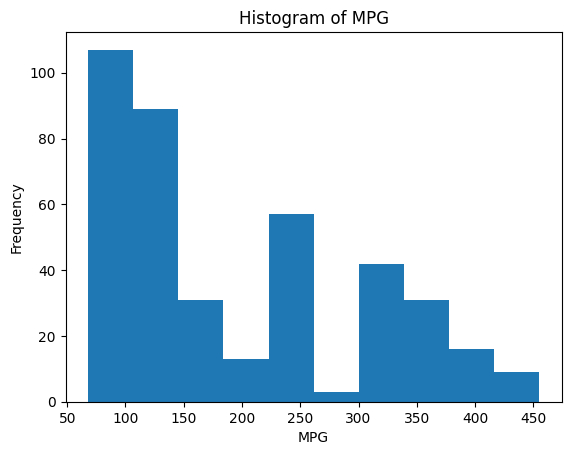

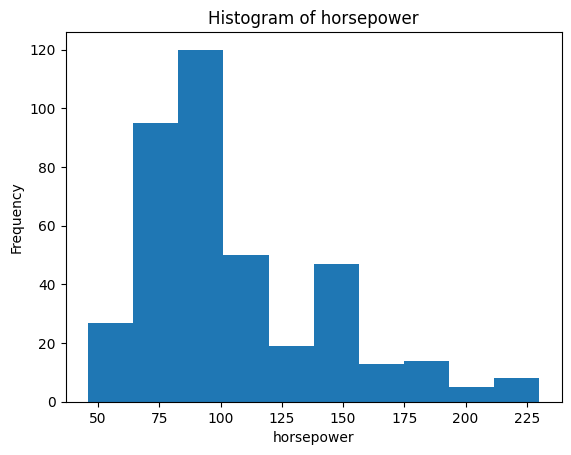

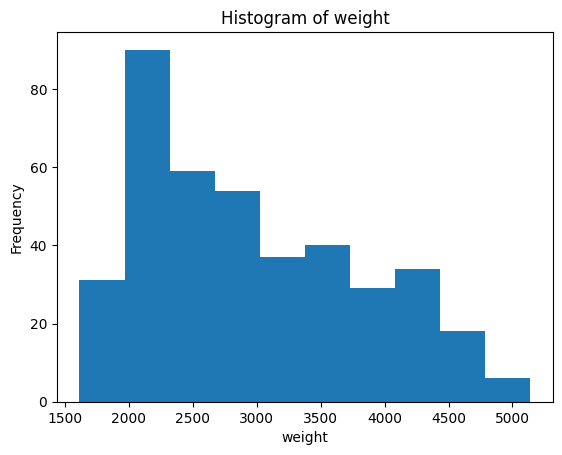

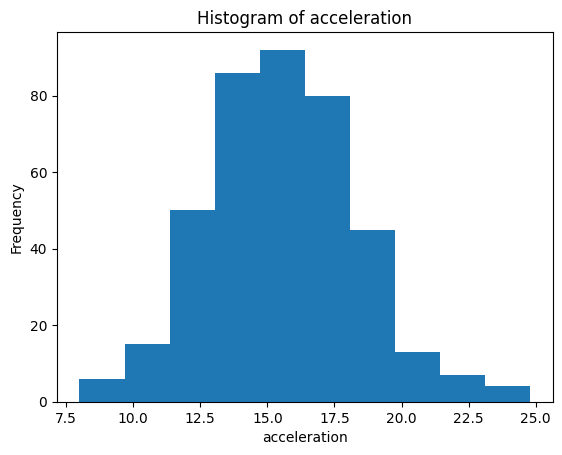

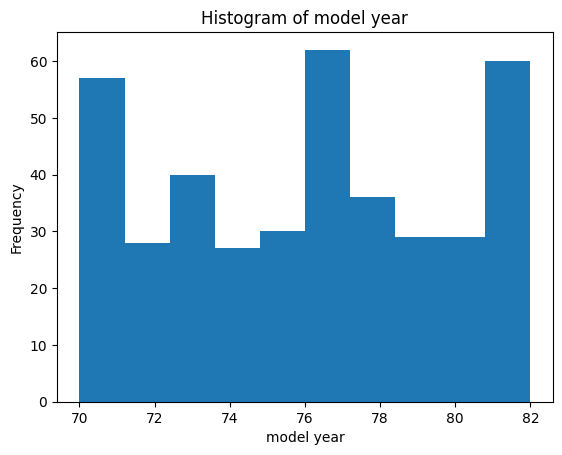

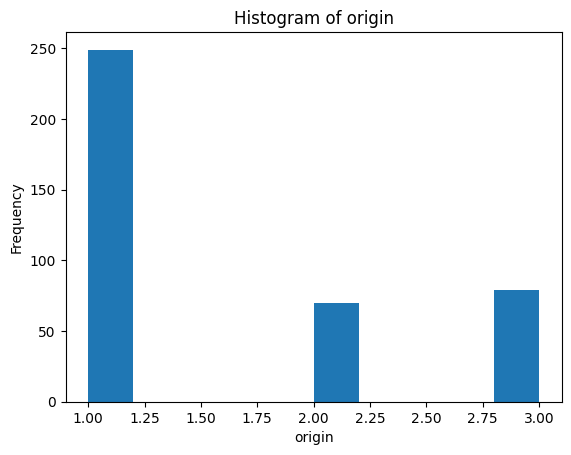

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

# Plot histogram of 'mpg'
plt.hist(df['mpg'], bins=10)
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Histogram of MPG')
plt.show()
# Plot histogram of 'cylinders'
plt.hist(df['cylinders'], bins=10)
plt.xlabel('cylinders')
plt.ylabel('Frequency')
plt.title('Histogram of cylinders')
plt.show()
# Plot histogram of 'displacement'
plt.hist(df['displacement'], bins=10)
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Histogram of MPG')
plt.show()
# Plot histogram of 'horsepower'
plt.hist(df['horsepower'], bins=10)
plt.xlabel('horsepower')
plt.ylabel('Frequency')
plt.title('Histogram of horsepower')
plt.show()
# Plot histogram of 'weight'
plt.hist(df['weight'], bins=10)
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.title('Histogram of weight')
plt.show()
# Plot histogram of 'acceleration'
plt.hist(df['acceleration'], bins=10)
plt.xlabel('acceleration')
plt.ylabel('Frequency')
plt.title('Histogram of acceleration')
plt.show()
# Plot histogram of 'model year'
plt.hist(df['model year'], bins=10)
plt.xlabel('model year')
plt.ylabel('Frequency')
plt.title('Histogram of model year')
plt.show()
# Plot histogram of 'origin'
plt.hist(df['origin'], bins=10)
plt.xlabel('origin')
plt.ylabel('Frequency')
plt.title('Histogram of origin')
plt.show()

Training Machine Learning Model

1.SVM

BUILD AND EVALUATE SVM MODEL
A. Cross Validation on Training Set
+-----------+----------------------+--------------------+---------------------+---------------------+
| Statistic |       Accuracy       |     Precision      |        Recall       |          F1         |
+-----------+----------------------+--------------------+---------------------+---------------------+
|   Count   |          5           |         5          |          5          |          5          |
|    Mean   |  0.9121527777777778  | 0.9119229491438794 |  0.9062658569500673 |  0.907708665376483  |
|    Std    | 0.037469412023203336 | 0.0434624894457363 | 0.03408385345884495 | 0.03818355560218019 |
|    Min    |       0.859375       | 0.8511904761904762 |  0.8630769230769231 |  0.8550943396226414 |
|    25%    |        0.875         | 0.8687179487179487 |  0.8687179487179487 |  0.8687179487179486 |
|    50%    |  0.9365079365079365  | 0.9326923076923077 |  0.9199999999999999 |  0.9321314952279958 |
|    75%    |    

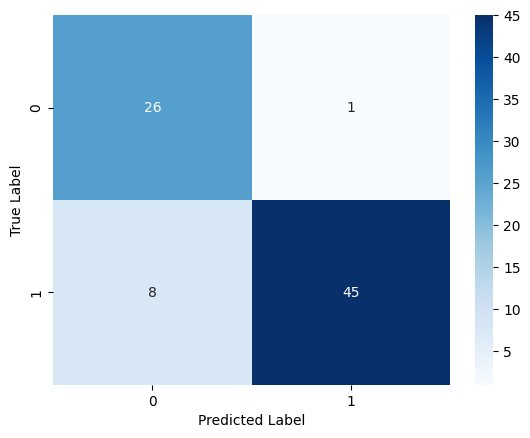

<Axes: >

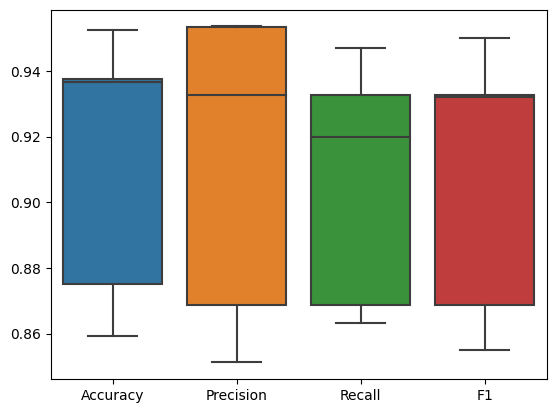

In [ ]:
svm = SVC(kernel='linear',C=5)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(svm, X_train, y_train, cv=5, scoring=scoring)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracySVM = cv_results['test_accuracy']
precisionSVM = cv_results['test_precision_macro']
recallSVM = cv_results['test_recall_macro']
f1SVM = cv_results['test_f1_macro']
accuracy_scSVM = accuracy_score(y_test, y_pred)
precision_scSVM = precision_score(y_test, y_pred)
recall_scSVM = recall_score(y_test, y_pred)
f1_scSVM = f1_score(y_test, y_pred)
print('BUILD AND EVALUATE SVM MODEL')
print('A. Cross Validation on Training Set')

table = PrettyTable()
table.field_names = ["Statistic", "Accuracy", "Precision", "Recall", "F1"]
table.add_row(["Count", len(accuracySVM), len(precisionSVM), len(recallSVM), len(f1SVM)])
table.add_row(["Mean", accuracySVM.mean(), precisionSVM.mean(), recallSVM.mean(), f1SVM.mean()])
table.add_row(["Std", accuracySVM.std(), precisionSVM.std(), recallSVM.std(), f1SVM.std()])
table.add_row(["Min", accuracySVM.min(), precisionSVM.min(), recallSVM.min(), f1SVM.min()])
table.add_row(["25%", pd.Series(accuracySVM).quantile(0.25), pd.Series(precisionSVM).quantile(0.25), pd.Series(recallSVM).quantile(0.25), pd.Series(f1SVM).quantile(0.25)])
table.add_row(["50%", pd.Series(accuracySVM).quantile(0.5), pd.Series(precisionSVM).quantile(0.5), pd.Series(recallSVM).quantile(0.5), pd.Series(f1SVM).quantile(0.5)])
table.add_row(["75%", pd.Series(accuracySVM).quantile(0.75), pd.Series(precisionSVM).quantile(0.75), pd.Series(recallSVM).quantile(0.75), pd.Series(f1SVM).quantile(0.75)])
table.add_row(["Max", accuracySVM.max(), precisionSVM.max(), recallSVM.max(), f1.max()])

print(table)
print('B. Final Validation on Test Set')


table1 = PrettyTable()
table1.field_names = [ "Accuracy", "Precision", "Recall", "F1"]
table1.add_row([accuracy_scSVM,precision_scSVM,recall_scSVM,f1_scSVM])
print(table1)
print(" ")
print(" ")
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
#Mô hình có kết quả training rất cao đều trên 0.9
#Tuy nhiên đối với hàm test thì recall đạt giá trị chỉ khoảng 85% điều này có thể cho thấy mô hình không thể phân loại được một số trường hợp thuộc lớp positive trên tập dữ liệu kiểm tra

# Tạo DataFrame chứa các giá trị cross validation scores
df_cv_scoresSVM = pd.DataFrame({'Accuracy': accuracySVM, 'Precision': precisionSVM, 'Recall': recallSVM, 'F1': f1SVM})

# Vẽ biểu đồ hộp
sns.boxplot(data=df_cv_scoresSVM)





2.KNN


BUILD AND EVALUATE KNN MODEL
A. Cross Validation on Training Set
+-----------+----------------------+---------------------+---------------------+---------------------+
| Statistic |       Accuracy       |      Precision      |        Recall       |          F1         |
+-----------+----------------------+---------------------+---------------------+---------------------+
|   Count   |          5           |          5          |          5          |          5          |
|    Mean   |  0.9058531746031745  |  0.9067662340357266 |  0.8950607287449394 |  0.899621049938709  |
|    Std    | 0.030905046860565756 | 0.03271138907332317 | 0.03365665180299783 | 0.03317967491353627 |
|    Min    |       0.859375       |  0.8603896103896104 |  0.8415384615384616 |  0.8486997635933806 |
|    25%    |       0.890625       |  0.8836032388663968 |  0.8887179487179487 |  0.8859180035650623 |
|    50%    |       0.90625        |  0.9077412513255567 |  0.8943589743589744 |  0.8999999999999999 |
|    75%

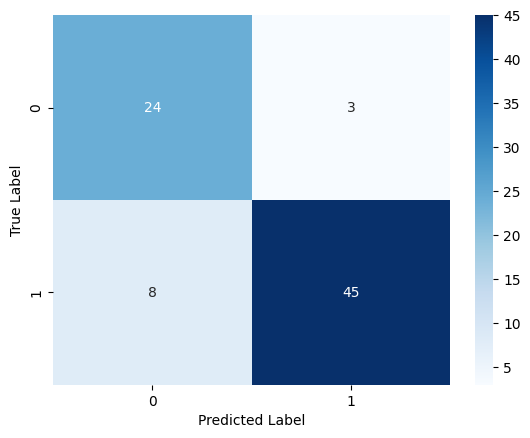

<Axes: >

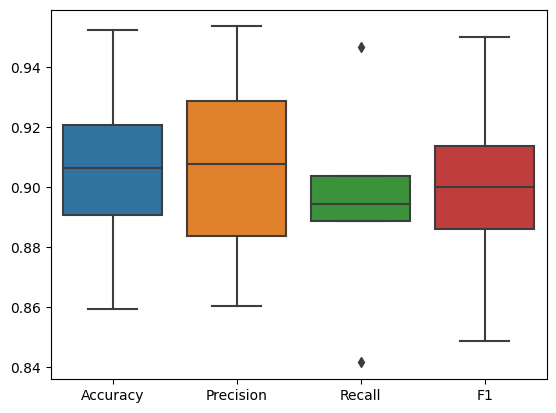

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = cv_results['test_accuracy']
precision = cv_results['test_precision_macro']
recall = cv_results['test_recall_macro']
f1 = cv_results['test_f1_macro']
accuracy_scKNN = accuracy_score(y_test, y_pred)
precision_scKNN = precision_score(y_test, y_pred)
recall_scKNN = recall_score(y_test, y_pred)
f1_scKNN = f1_score(y_test, y_pred)

print('BUILD AND EVALUATE KNN MODEL')
print('A. Cross Validation on Training Set')

table = PrettyTable()
table.field_names = ["Statistic", "Accuracy", "Precision", "Recall", "F1"]
table.add_row(["Count", len(accuracy), len(precision), len(recall), len(f1)])
table.add_row(["Mean", accuracy.mean(), precision.mean(), recall.mean(), f1.mean()])
table.add_row(["Std", accuracy.std(), precision.std(), recall.std(), f1.std()])
table.add_row(["Min", accuracy.min(), precision.min(), recall.min(), f1.min()])
table.add_row(["25%", pd.Series(accuracy).quantile(0.25), pd.Series(precision).quantile(0.25), pd.Series(recall).quantile(0.25), pd.Series(f1).quantile(0.25)])
table.add_row(["50%", pd.Series(accuracy).quantile(0.5), pd.Series(precision).quantile(0.5), pd.Series(recall).quantile(0.5), pd.Series(f1).quantile(0.5)])
table.add_row(["75%", pd.Series(accuracy).quantile(0.75), pd.Series(precision).quantile(0.75), pd.Series(recall).quantile(0.75), pd.Series(f1).quantile(0.75)])
table.add_row(["Max", accuracy.max(), precision.max(), recall.max(), f1.max()])

print(table)
print('B. Final Validation on Test Set')


table1 = PrettyTable()
table1.field_names = [ "Accuracy", "Precision", "Recall", "F1"]
table1.add_row([accuracy_scKNN,precision_scKNN,recall_scKNN,f1_scKNN])
print(table1)
print(" ")
print(" ")

confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
#Dựa trên confusion matrix và các chỉ số hiệu suất, mô hình KNN có Accuracy và Precision thấp hơn so với mô hình trước đó, chỉ đạt khoảng 90%. 
#Điều này cho thấy mô hình không hoạt động tốt cho tác vụ phân loại trên dữ liệu này.  Recall  và điểm F1 của mô hình cũng đạt mức khá thấp. 
#Kết quả kiểm tra trên tập dữ liệu giữ lại cho thấy Recall  của mô hình chỉ đạt khoảng 85%, tương tự như mô hình trước đó. 
#Tuy nhiên, Precision của mô hình trên tập kiểm tra có vẻ tốt hơn, đạt khoảng 94%. Tuy nhiên, với các chỉ số trên đã cho, mô hình KNN có thể không phù hợp cho tác vụ phân loại dữ liệu này.
import pandas as pd
import seaborn as sns

# Tạo DataFrame chứa các giá trị cross validation scores
df_cv_scoresKNN = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})

# Vẽ biểu đồ hộp
sns.boxplot(data=df_cv_scoresKNN)

3.Naïve Bayes

BUILD AND EVALUATE NB MODEL
A. Cross Validation on Training Set
+-----------+---------------------+----------------------+----------------------+---------------------+
| Statistic |       Accuracy      |      Precision       |        Recall        |          F1         |
+-----------+---------------------+----------------------+----------------------+---------------------+
|   Count   |          5          |          5           |          5           |          5          |
|    Mean   |  0.9185019841269841 |  0.9145373663563422  |  0.9202753036437248  |   0.91565104324687  |
|    Std    | 0.04960257936150789 | 0.050543876336071464 | 0.047084617278186414 | 0.05019539953306275 |
|    Min    |       0.828125      |  0.8225490196078431  |  0.8374358974358974  |  0.8246575342465754 |
|    25%    |       0.90625       |  0.8988988988988988  |  0.9087179487179488  |  0.902834008097166  |
|    50%    |        0.9375       |  0.941675503711559   |  0.9271794871794872  |  0.9333333333333333 |


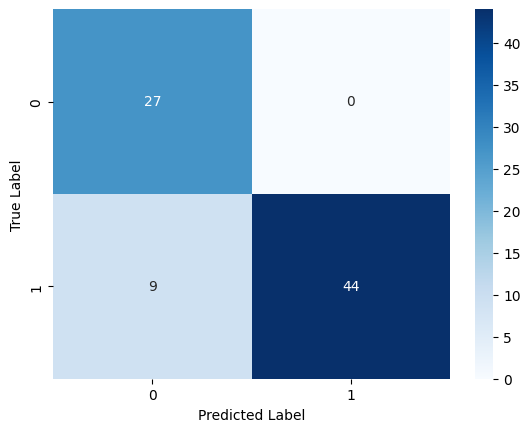

<Axes: >

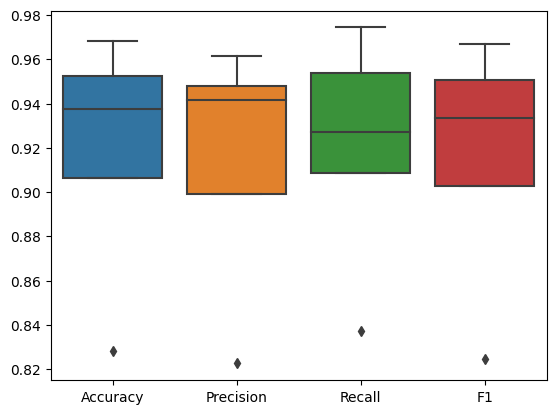

In [ ]:
nb = GaussianNB(var_smoothing=1e-09)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(nb, X_train, y_train, cv=5, scoring=scoring)

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = cv_results['test_accuracy']
precision = cv_results['test_precision_macro']
recall = cv_results['test_recall_macro']
f1 = cv_results['test_f1_macro']
accuracy_scNB = accuracy_score(y_test, y_pred)
precision_scNB = precision_score(y_test, y_pred)
recall_scNB = recall_score(y_test, y_pred)
f1_scNB = f1_score(y_test, y_pred)

print('BUILD AND EVALUATE NB MODEL')
print('A. Cross Validation on Training Set')

table = PrettyTable()
table.field_names = ["Statistic", "Accuracy", "Precision", "Recall", "F1"]
table.add_row(["Count", len(accuracy), len(precision), len(recall), len(f1)])
table.add_row(["Mean", accuracy.mean(), precision.mean(), recall.mean(), f1.mean()])
table.add_row(["Std", accuracy.std(), precision.std(), recall.std(), f1.std()])
table.add_row(["Min", accuracy.min(), precision.min(), recall.min(), f1.min()])
table.add_row(["25%", pd.Series(accuracy).quantile(0.25), pd.Series(precision).quantile(0.25), pd.Series(recall).quantile(0.25), pd.Series(f1).quantile(0.25)])
table.add_row(["50%", pd.Series(accuracy).quantile(0.5), pd.Series(precision).quantile(0.5), pd.Series(recall).quantile(0.5), pd.Series(f1).quantile(0.5)])
table.add_row(["75%", pd.Series(accuracy).quantile(0.75), pd.Series(precision).quantile(0.75), pd.Series(recall).quantile(0.75), pd.Series(f1).quantile(0.75)])
table.add_row(["Max", accuracy.max(), precision.max(), recall.max(), f1.max()])

print(table)
print('B. Final Validation on Test Set')


table1 = PrettyTable()
table1.field_names = [ "Accuracy", "Precision", "Recall", "F1"]
table1.add_row([accuracy_scNB,precision_scNB,recall_scNB,f1_scNB])
print(table1)
print(" ")
print(" ")
# In sơ đồ
print(" ")
print(" ")
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
#Dựa trên confusion matrix và các chỉ số hiệu suất, mô hình Naïve Bayes cho thấy độ chính xác và độ chính xác positive tính rất cao, đạt trên 91%, với độ nhạy và điểm F1 khá tốt. 
#Điểm đáng chú ý của mô hình này là không có trường hợp nào bị dự đoán sai thành thuộc lớp negative. Kết quả kiểm tra trên tập dữ liệu giữ lại cho thấy độ chính xác positive tính của mô hình đạt 100%, 
#tuy nhiên độ nhạy của mô hình khá thấp, chỉ khoảng 83%. Tuy nhiên, với các chỉ số trên đã cho, mô hình Naïve Bayes là một lựa chọn tốt cho tác vụ phân loại dữ liệu này.
# Tạo DataFrame chứa các giá trị cross validation scores
df_cv_scoresNB = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})

# Vẽ biểu đồ hộp
sns.boxplot(data=df_cv_scoresNB)

4.Rừng cây ngẫu nhiên

BUILD AND EVALUATE RF MODEL
A. Cross Validation on Training Set
+-----------+---------------------+----------------------+---------------------+---------------------+
| Statistic |       Accuracy      |      Precision       |        Recall       |          F1         |
+-----------+---------------------+----------------------+---------------------+---------------------+
|   Count   |          5          |          5           |          5          |          5          |
|    Mean   |  0.9215773809523808 |  0.9193812136568458  |  0.916897435897436  |  0.9175721559618009 |
|    Std    | 0.03819521747310897 | 0.042190675532338844 | 0.03749068698733567 | 0.03974954799421558 |
|    Min    |        0.875        |  0.8668668668668669  |  0.8758974358974358 |  0.8704453441295547 |
|    25%    |       0.890625      |        0.8875        |  0.8815384615384616 |  0.8842676311030742 |
|    50%    |  0.9206349206349206 |  0.9136842105263158  |  0.9198717948717949 |  0.9165120593692022 |
|    75% 

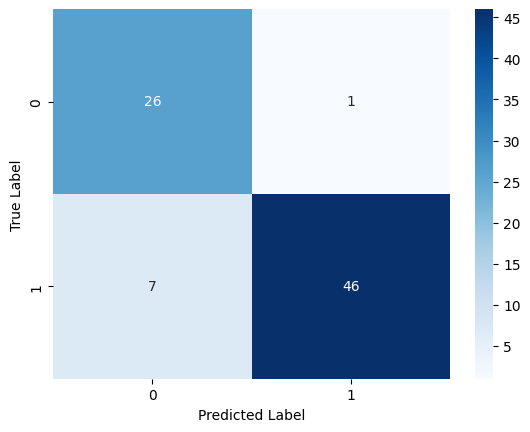

<Axes: >

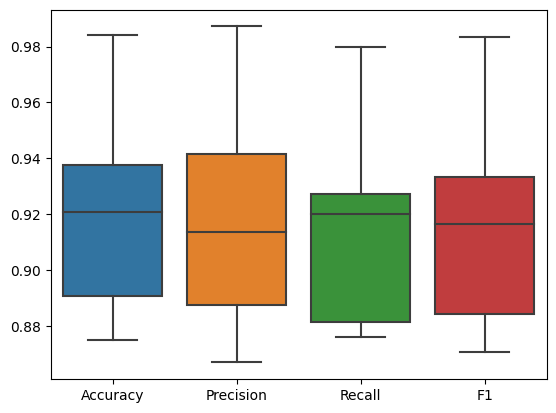

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=2)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(rf, X_train, y_train, cv=5, scoring=scoring)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = cv_results['test_accuracy']
precision = cv_results['test_precision_macro']
recall = cv_results['test_recall_macro']
f1 = cv_results['test_f1_macro']
accuracy_scRF = accuracy_score(y_test, y_pred)
precision_scRF = precision_score(y_test, y_pred)
recall_scRF = recall_score(y_test, y_pred)
f1_scRF = f1_score(y_test, y_pred)

print('BUILD AND EVALUATE RF MODEL')
print('A. Cross Validation on Training Set')

table = PrettyTable()
table.field_names = ["Statistic", "Accuracy", "Precision", "Recall", "F1"]
table.add_row(["Count", len(accuracy), len(precision), len(recall), len(f1)])
table.add_row(["Mean", accuracy.mean(), precision.mean(), recall.mean(), f1.mean()])
table.add_row(["Std", accuracy.std(), precision.std(), recall.std(), f1.std()])
table.add_row(["Min", accuracy.min(), precision.min(), recall.min(), f1.min()])
table.add_row(["25%", pd.Series(accuracy).quantile(0.25), pd.Series(precision).quantile(0.25), pd.Series(recall).quantile(0.25), pd.Series(f1).quantile(0.25)])
table.add_row(["50%", pd.Series(accuracy).quantile(0.5), pd.Series(precision).quantile(0.5), pd.Series(recall).quantile(0.5), pd.Series(f1).quantile(0.5)])
table.add_row(["75%", pd.Series(accuracy).quantile(0.75), pd.Series(precision).quantile(0.75), pd.Series(recall).quantile(0.75), pd.Series(f1).quantile(0.75)])
table.add_row(["Max", accuracy.max(), precision.max(), recall.max(), f1.max()])

print(table)
print('B. Final Validation on Test Set')


table1 = PrettyTable()
table1.field_names = [ "Accuracy", "Precision", "Recall", "F1"]
table1.add_row([accuracy_scRF,precision_scRF,recall_scRF,f1_scRF])
print(table1)
print(" ")
print(" ")
# In sơ đồ
print(" ")
print(" ")
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
#Dựa trên confusion matrix và các chỉ số hiệu suất, mô hình Rừng ngẫu nhiên cho thấy độ chính xác và độ chính xác positive tính rất cao, đạt trên 91%, với độ nhạy và điểm F1 khá tốt. 
#Điểm đáng chú ý của mô hình này là chỉ có 1 trường hợp bị dự đoán sai thành thuộc lớp negative. Kết quả kiểm tra trên tập dữ liệu giữ lại cho thấy độ chính xác positive tính của mô hình đạt 98%, 
#và độ nhạy của mô hình cũng khá cao, đạt khoảng 87%, tuy nhiên điểm F1 không thực sự tốt, chỉ khoảng 92%. Với các chỉ số trên đã cho, 
#mô hình Rừng ngẫu nhiên là một lựa chọn tốt cho tác vụ phân loại dữ liệu này, tuy nhiên cần kiểm tra kỹ hơn các các điểm dữ liệu bị phân loại sai để cải thiện độ nhạy của mô hình.
df_cv_scoresRF = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})

# Vẽ biểu đồ hộp
sns.boxplot(data=df_cv_scoresRF)

5.Cây quyết định

BUILD AND EVALUATE DecisionTreeClassifier MODEL
A. Cross Validation on Training Set
+-----------+----------------------+----------------------+---------------------+----------------------+
| Statistic |       Accuracy       |      Precision       |        Recall       |          F1          |
+-----------+----------------------+----------------------+---------------------+----------------------+
|   Count   |          5           |          5           |          5          |          5           |
|    Mean   |  0.9184523809523808  |  0.9168889594898413  |  0.9112948717948719 |  0.9136768090680191  |
|    Std    | 0.037395464548130294 | 0.039811705914667594 | 0.03928236091462623 | 0.039607608192887826 |
|    Min    |        0.875         |  0.8738069989395546  |  0.8615384615384616 |  0.8666666666666667  |
|    25%    |       0.890625       |  0.8836032388663968  |  0.8887179487179487 |  0.8859180035650623  |
|    50%    |  0.9206349206349206  |  0.9190217391304347  |  0.9118589743589

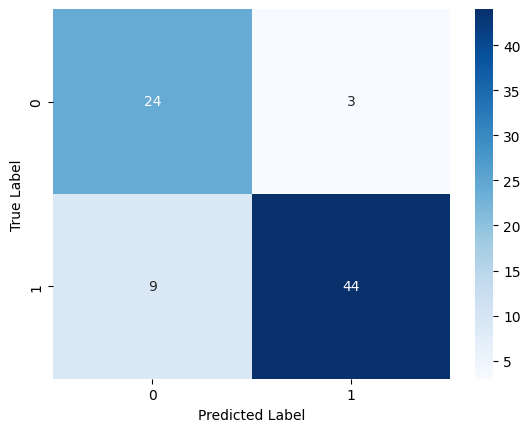

<Axes: >

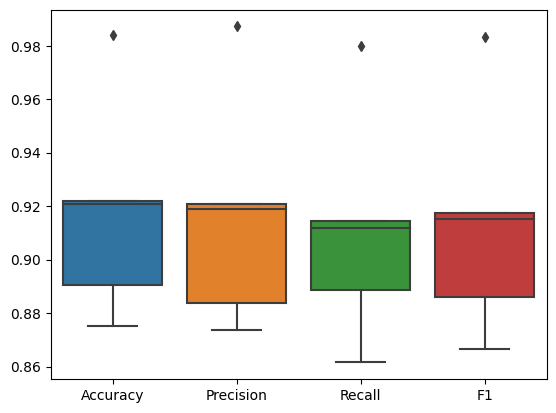

In [ ]:
dtc = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(dtc, X_train, y_train, cv=5, scoring=scoring)

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = cv_results['test_accuracy']
precision = cv_results['test_precision_macro']
recall = cv_results['test_recall_macro']
f1 = cv_results['test_f1_macro']
accuracy_scDTC = accuracy_score(y_test, y_pred)
precision_scDTC = precision_score(y_test, y_pred)
recall_scDTC = recall_score(y_test, y_pred)
f1_scDTC = f1_score(y_test, y_pred)

print('BUILD AND EVALUATE DecisionTreeClassifier MODEL')
print('A. Cross Validation on Training Set')

table = PrettyTable()
table.field_names = ["Statistic", "Accuracy", "Precision", "Recall", "F1"]
table.add_row(["Count", len(accuracy), len(precision), len(recall), len(f1)])
table.add_row(["Mean", accuracy.mean(), precision.mean(), recall.mean(), f1.mean()])
table.add_row(["Std", accuracy.std(), precision.std(), recall.std(), f1.std()])
table.add_row(["Min", accuracy.min(), precision.min(), recall.min(), f1.min()])
table.add_row(["25%", pd.Series(accuracy).quantile(0.25), pd.Series(precision).quantile(0.25), pd.Series(recall).quantile(0.25), pd.Series(f1).quantile(0.25)])
table.add_row(["50%", pd.Series(accuracy).quantile(0.5), pd.Series(precision).quantile(0.5), pd.Series(recall).quantile(0.5), pd.Series(f1).quantile(0.5)])
table.add_row(["75%", pd.Series(accuracy).quantile(0.75), pd.Series(precision).quantile(0.75), pd.Series(recall).quantile(0.75), pd.Series(f1).quantile(0.75)])
table.add_row(["Max", accuracy.max(), precision.max(), recall.max(), f1.max()])

print(table)
print('B. Final Validation on Test Set')


table1 = PrettyTable()
table1.field_names = [ "Accuracy", "Precision", "Recall", "F1"]
table1.add_row([accuracy_scDTC,precision_scDTC,recall_scDTC,f1_scDTC])
print(table1)
print(" ")
print(" ")

print(" ")
print(" ")
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
#Dựa trên kết quả đánh giá, mô hình dường như đang hoạt động khá tốt. Điểm trung bình cho các chỉ số về độ chính xác, độ chính xác, khả năng thu hồi và F1 là khoảng 0,90, 
#cho thấy rằng mô hình nhất quán về hiệu suất của nó trên các màn hình khác nhau.
# Độ lệch chuẩn tương đối nhỏ, cho thấy hiệu suất của mô hình là ổn định.

#Điểm số tối thiểu cũng tương đối cao, cho thấy mô hình không hoạt động kém trên bất kỳ nếp gấp cụ thể nào. 
#Tuy nhiên, điểm số tối đa không cao, cho thấy rằng kiểu máy này có thể không hoạt động xuất sắc trên một số nếp gấp.

#Kết quả thử nghiệm cho thấy mô hình có độ chính xác là 0,8375, độ chính xác là 0,9167, khả năng thu hồi là 0,8302 và điểm F1 là 0,8713 trên bộ thử nghiệm. 
#Ma trận nhầm lẫn cho thấy mô hình đã phân loại chính xác hầu hết các trường hợp, nhưng có một số phân loại sai.

#Nhìn chung, mô hình dường như đang hoạt động khá tốt, nhưng vẫn còn chỗ cần cải thiện
df_cv_scoresDTF = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})

# Vẽ biểu đồ hộp
sns.boxplot(data=df_cv_scoresDTF)

6.Neural network

<ipython-input-69-6d1533629ed9>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, epochs=50, batch_size=32, verbose=0)


3/3 [==============================] - 0s 4ms/step
BUILD AND EVALUATE DecisionTreeClassifier MODEL
A. Cross Validation on Training Set
+-----------+---------------------+---------------------+---------------------+---------------------+
| Statistic |       Accuracy      |      Precision      |        Recall       |          F1         |
+-----------+---------------------+---------------------+---------------------+---------------------+
|   Count   |          5          |          5          |          5          |          5          |
|    Mean   |  0.9118551587301587 |  0.922226954419871  |  0.9014581646423752 |  0.9056610977064132 |
|    Std    | 0.03257218058748498 | 0.03291683390744208 | 0.03544665653568458 | 0.03442506191110811 |
|    Min    |  0.873015873015873  |  0.8719452590420332 |  0.8468421052631578 |  0.8603104212860311 |
|    25%    |        0.875        |  0.8941387559808612 |  0.8902564102564102 |  0.873015873015873  |
|    50%    |  0.9206349206349206 |  0.9431818181

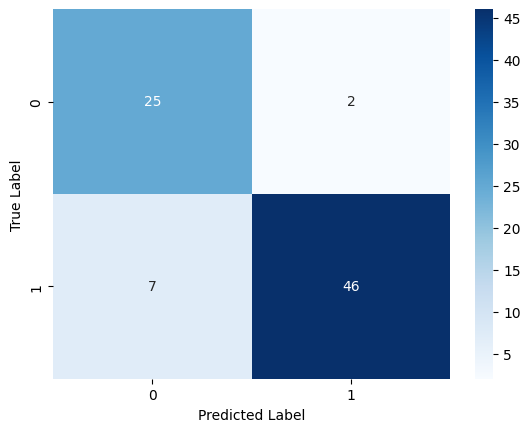

<Axes: >

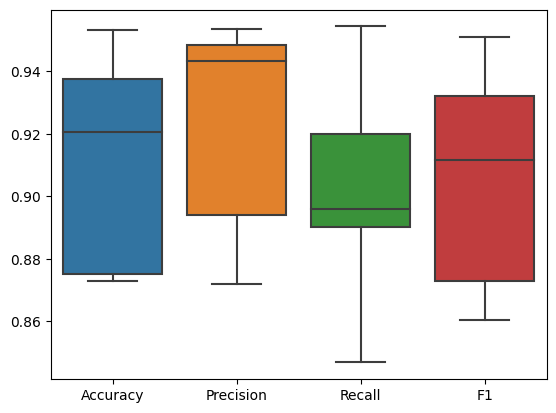

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import precision_score
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

# define the model builder function
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# wrap the model using KerasClassifier
model = KerasClassifier(build_fn=build_model, epochs=50, batch_size=32, verbose=0)

# define the cross-validation method
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# evaluate the model using cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# make predictions on the test set
y_pred_prob = model.predict_proba(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = cv_results['test_accuracy']
precision = cv_results['test_precision_macro']
recall = cv_results['test_recall_macro']
f1 = cv_results['test_f1_macro']
accuracy_scNW = accuracy_score(y_test, y_pred)
precision_scNW = precision_score(y_test, y_pred)
recall_scNW = recall_score(y_test, y_pred)
f1_scNW = f1_score(y_test, y_pred)
# print the results
print('BUILD AND EVALUATE DecisionTreeClassifier MODEL')
print('A. Cross Validation on Training Set')

table = PrettyTable()
table.field_names = ["Statistic", "Accuracy", "Precision", "Recall", "F1"]
table.add_row(["Count", len(accuracy), len(precision), len(recall), len(f1)])
table.add_row(["Mean", accuracy.mean(), precision.mean(), recall.mean(), f1.mean()])
table.add_row(["Std", accuracy.std(), precision.std(), recall.std(), f1.std()])
table.add_row(["Min", accuracy.min(), precision.min(), recall.min(), f1.min()])
table.add_row(["25%", pd.Series(accuracy).quantile(0.25), pd.Series(precision).quantile(0.25), pd.Series(recall).quantile(0.25), pd.Series(f1).quantile(0.25)])
table.add_row(["50%", pd.Series(accuracy).quantile(0.5), pd.Series(precision).quantile(0.5), pd.Series(recall).quantile(0.5), pd.Series(f1).quantile(0.5)])
table.add_row(["75%", pd.Series(accuracy).quantile(0.75), pd.Series(precision).quantile(0.75), pd.Series(recall).quantile(0.75), pd.Series(f1).quantile(0.75)])
table.add_row(["Max", accuracy.max(), precision.max(), recall.max(), f1.max()])

print(table)
print('B. Final Validation on Test Set')


table1 = PrettyTable()
table1.field_names = [ "Accuracy", "Precision", "Recall", "F1"]
table1.add_row([accuracy_scNW,precision_scNW,recall_scNW,f1_scNW])
print(table1)
print(" ")
print(" ")

confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
#Mạng neural được sử dụng cho tác vụ này là một mạng truyền thẳng đơn giản với một lớp ẩn và 64 đơn vị. 
#Lớp đầu vào có số đơn vị bằng với số đặc tính trong tập dữ liệu và lớp đầu ra có một đơn vị với hàm kích hoạt sigmoid, làm cho đầu ra trở thành giá trị xác suất giữa 0 và 1. 
#Hàm mất mát cross-entropy nhị phân và bộ tối ưu hóa Adam được sử dụng để huấn luyện mô hình. Mô hình được huấn luyện trong 50 epoch với kích thước lô là 32.
df_cv_scores = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})

# Vẽ biểu đồ hộp
sns.boxplot(data=df_cv_scores)

3. Tổng hợp


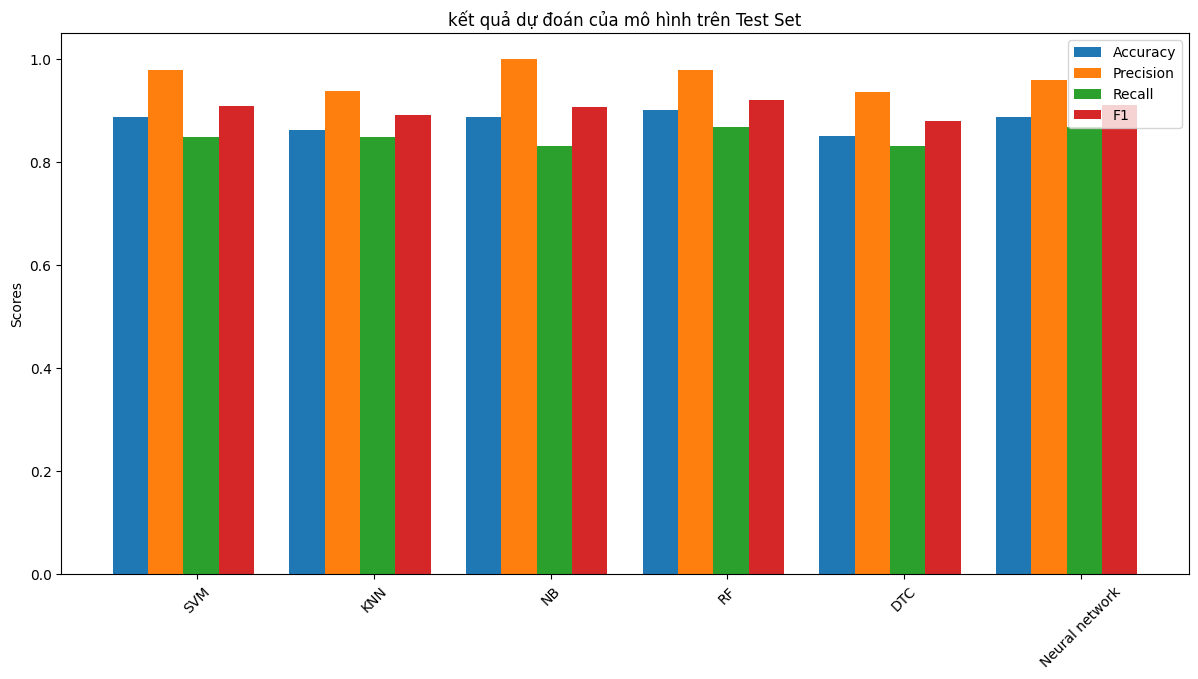

In [ ]:
import matplotlib.pyplot as plt

models = ['SVM', 'KNN', 'NB', 'RF', 'DTC', 'Neural network']
accuracy = [accuracy_scSVM, accuracy_scKNN, accuracy_scNB, accuracy_scRF, accuracy_scDTC,accuracy_scNW   ]
precision = [precision_scSVM,precision_scKNN,precision_scNB,precision_scRF,precision_scDTC,precision_scNW  ]
recall = [recall_scSVM,recall_scKNN,recall_scNB,recall_scRF,recall_scDTC,recall_scNW]
f1 = [f1_scSVM,f1_scKNN,f1_scNB,f1_scRF,f1_scDTC,f1_scNW  ]

x = [i for i, _ in enumerate(models)]
width = 0.2
fig, ax = plt.subplots(figsize=(12, 6))
fig.tight_layout()
rects1 = ax.bar(x, accuracy, width, color='tab:blue', label='Accuracy')
rects2 = ax.bar([i + width for i in x], precision, width, color='tab:orange', label='Precision')
rects3 = ax.bar([i + 2*width for i in x], recall, width, color='tab:green', label='Recall')
rects4 = ax.bar([i + 3*width for i in x], f1, width, color='tab:red', label='F1')
ax.set_title('kết quả dự đoán của mô hình trên Test Set')
ax.set_ylabel('Scores')
ax.set_xticks([i + 1.9*width for i in x])
ax.set_xticklabels(models)
ax.legend()

plt.xticks(rotation=45)

plt.show()
